In [18]:
#Coinmarket API
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b4212c21-efa2-4c10-8da9-c86d2bb70a54',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2022-07-20T04:17:18.761Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9926}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9626, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [19]:
# if data rate exceed go to anaconda prompt command and enter ' jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10'
#use the given url into the command promt and copy paste it to the browser and access the jupyter notebook file 

type(data)

dict

In [20]:
import pandas as pd 

pd.set_option('display.max_columns', None)

In [21]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2022-07-20T04:17:18.761Z,0,None,18,1,None,9926


In [22]:
#Create timestamp and dataframe
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9626,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.909819e+07,1.909819e+07,NaN,1,NaN,NaN,None,2022-07-20T04:15:00.000Z,23468.533977,4.695038e+10,1.7347,0.666803,7.674896,20.381736,17.356104,-19.765365,-43.731386,4.482065e+11,42.4354,4.928392e+11,None,2022-07-20T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
1,1027,Ethereum,ETH,ethereum,5827,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.216194e+08,1.216194e+08,NaN,2,NaN,NaN,None,2022-07-20T04:14:00.000Z,1563.740039,2.355032e+10,-23.4980,1.199005,3.928724,48.203059,44.812269,-20.380146,-49.565704,1.901812e+11,18.0886,1.901812e+11,None,2022-07-20T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
2,825,Tether,USDT,tether,36314,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.584628e+10,6.816698e+10,NaN,3,NaN,NaN,None,2022-07-20T04:14:00.000Z,1.000014,7.244061e+10,-9.4465,-0.004233,0.014848,0.072032,0.116286,0.127782,-0.042763,6.584722e+10,6.2343,6.816795e+10,None,2022-07-20T04:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-20 04:17:22.766546
3,3408,USD Coin,USDC,usd-coin,4903,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.479645e+10,5.479645e+10,NaN,4,NaN,NaN,None,2022-07-20T04:14:00.000Z,0.999910,9.049473e+09,-2.9321,-0.015833,0.015175,-0.025972,-0.020826,-0.036316,-0.025247,5.479153e+10,5.2113,5.479153e+10,None,2022-07-20T04:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-20 04:17:22.766546
4,1839,BNB,BNB,bnb,1011,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-07-20T04:14:00.000Z,268.317138,1.840085e+09,1.2829,0.697262,4.519215,19.970507,29.040936,-11.248125,-36.404740,4.328955e+10,4.0986,5.366343e+10,None,2022-07-20T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
5,52,XRP,XRP,xrp,765,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,6,NaN,NaN,None,2022-07-20T04:15:00.000Z,0.377666,1.511977e+09,-8.0644,1.195888,6.931851,20.903574,18.679585,-8.171629,-49.922299,1.825756e+10,1.7170,3.776662e+10,None,2022-07-20T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
6,2010,Cardano,ADA,cardano,518,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.451285e+10,NaN,7,NaN,NaN,None,2022-07-20T04:14:00.000Z,0.527672,1.511917e+09,-7.8895,0.778084,11.092754,25.225255,12.616146,0.675429,-44.436081,1.790604e+10,1.7031,2.374523e+10,None,2022-07-20T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
7,4687,Binance USD,BUSD,binance-usd,4081,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,8,NaN,NaN,None,2022-07-20T04:14:00.000Z,0.999273,8.052558e+09,-7.6368,0.005586,0.014407,-0.150981,-0.013346,-0.008266,-0.218523,1.753447e+10,1.6601,1.753447e+10,None,2022-07-20T04:14:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-20 04:17:22.766546
8,5426,Solana,SOL,solana,349,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.456080e+08,5.116169e+08,NaN,9,NaN,NaN,N

In [109]:
#Create API function and CSV
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b4212c21-efa2-4c10-8da9-c86d2bb70a54',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
#NOTE:     
# if data rate exceed go to anaconda prompt command and enter ' jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10'
#use the given url into the command promt and copy paste it to the browser and access the jupyter notebook file 
 
    df2 = pd.json_normalize(data['data'])

    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    if not os.path.isfile(r'C:\Users\senay\API.csv'): 
        df.to_csv(r'C:\Users\senay\API.csv', header = 'column_names')
    else: 
        df.to_csv(r'C:\Users\senay\API.csv', mode ='a', header = False)

In [110]:
#Automate our function
import os 
from time import time 
from time import sleep 

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully!')
    sleep(60) #sleep for 1 minute
    
exit()

API Runner Completed Successfully!
API Runner Completed Successfully!
API Runner Completed Successfully!
API Runner Completed Successfully!
API Runner Completed Successfully!
API Runner Completed Successfully!


KeyboardInterrupt: 

In [111]:
#Read CSV to dataframe
dfx = pd.read_csv(r'C:\Users\senay\API.csv')
dfx

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9626,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19098187.00000,19098187.00000,NaN,1,NaN,NaN,NaN,2022-07-20T04:15:00.000Z,23468.53398,46950375214.74360,1.73470,0.66680,7.67490,20.38174,17.35610,-19.76536,-43.73139,448206450515.86243,42.43540,492839213524.98999,NaN,2022-07-20T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
1,1,1027,Ethereum,ETH,ethereum,5827,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121619439.06150,121619439.06150,NaN,2,NaN,NaN,NaN,2022-07-20T04:14:00.000Z,1563.74004,23550315868.14244,-23.49800,1.19900,3.92872,48.20306,44.81227,-20.38015,-49.56570,190181186322.98230,18.08860,190181186322.98001,NaN,2022-07-20T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
2,2,825,Tether,USDT,tether,36314,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,65846277710.38712,68166976393.57944,NaN,3,NaN,NaN,NaN,2022-07-20T04:14:00.000Z,1.00001,72440611550.02353,-9.44650,-0.00423,0.01485,0.07203,0.11629,0.12778,-0.04276,65847215538.12484,6.23430,68167947274.30000,NaN,2022-07-20T04:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-20 04:17:22.766546
3,3,3408,USD Coin,USDC,usd-coin,4903,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,54796446532.76920,54796446532.76920,NaN,4,NaN,NaN,NaN,2022-07-20T04:14:00.000Z,0.99991,9049473199.31330,-2.93210,-0.01583,0.01518,-0.02597,-0.02083,-0.03632,-0.02525,54791530189.97845,5.21130,54791530189.98000,NaN,2022-07-20T04:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-20 04:17:22.766546
4,4,1839,BNB,BNB,bnb,1011,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-07-20T04:14:00.000Z,268.31714,1840084815.54602,1.28290,0.69726,4.51921,19.97051,29.04094,-11.24812,-36.40474,43289552116.99231,4.09860,53663427561.03000,NaN,2022-07-20T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10,4943,Dai,DAI,multi-collateral-dai,1040,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'ethereum-ecosystem', '...",NaN,7299598323.76328,7299598323.76328,NaN,11,NaN,NaN,NaN,2022-07-21T03:56:00.000Z,0.99914,340440063.63604,20.11500,0.00052,-0.11422,-0.11150,-0.12183,-0.16787,-0.05661,7293304021.61974,0.71340,7293304021.62000,NaN,2022-07-21T03:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-07-21 03:58:45.912910
1211,11,6636,Polkadot,DOT,polkadot-new,366,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,987579314.95709,1103303471.38227,NaN,12,904869778.00000,6576306503.51705,NaN,2022-07-21T03:56:00.000Z,7.26768,694613347.70031,-1.07550,-0.03561,-7.89327,12.35150,-7.88822,-26.90334,-60.31273,7177413180.98391,0.70240,8018459639.84000,NaN,2022-07-21T03:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 03:58:45.912910
1212,12,5805,Avalanche,AVAX,avalanche,285,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",720000000.00000,283874717.32549,40422

In [112]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9626,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19098187.00000,19098187.00000,NaN,1,NaN,NaN,None,2022-07-20T04:15:00.000Z,23468.53398,46950375214.74360,1.73470,0.66680,7.67490,20.38174,17.35610,-19.76536,-43.73139,448206450515.86237,42.43540,492839213524.98999,None,2022-07-20T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
1,1027,Ethereum,ETH,ethereum,5827,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121619439.06150,121619439.06150,NaN,2,NaN,NaN,None,2022-07-20T04:14:00.000Z,1563.74004,23550315868.14244,-23.49800,1.19900,3.92872,48.20306,44.81227,-20.38015,-49.56570,190181186322.98230,18.08860,190181186322.98001,None,2022-07-20T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
2,825,Tether,USDT,tether,36314,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65846277710.38712,68166976393.57944,NaN,3,NaN,NaN,None,2022-07-20T04:14:00.000Z,1.00001,72440611550.02353,-9.44650,-0.00423,0.01485,0.07203,0.11629,0.12778,-0.04276,65847215538.12484,6.23430,68167947274.30000,None,2022-07-20T04:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-20 04:17:22.766546
3,3408,USD Coin,USDC,usd-coin,4903,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54796446532.76920,54796446532.76920,NaN,4,NaN,NaN,None,2022-07-20T04:14:00.000Z,0.99991,9049473199.31330,-2.93210,-0.01583,0.01518,-0.02597,-0.02083,-0.03632,-0.02525,54791530189.97845,5.21130,54791530189.98000,None,2022-07-20T04:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-20 04:17:22.766546
4,1839,BNB,BNB,bnb,1011,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-20T04:14:00.000Z,268.31714,1840084815.54602,1.28290,0.69726,4.51921,19.97051,29.04094,-11.24812,-36.40474,43289552116.99231,4.09860,53663427561.03000,None,2022-07-20T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,4943,Dai,DAI,multi-collateral-dai,1040,2019-11-22T00:00:00.000Z,"[defi, stablecoin, ethereum-ecosystem, avalanc...",NaN,7299598323.76328,7299598323.76328,NaN,11,NaN,NaN,None,2022-07-21T03:56:00.000Z,0.99914,340440063.63604,20.11500,0.00052,-0.11422,-0.11150,-0.12183,-0.16787,-0.05661,7293304021.61974,0.71340,7293304021.62000,None,2022-07-21T03:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-07-21 03:58:45.912910
11,6636,Polkadot,DOT,polkadot-new,366,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,987579314.95709,1103303471.38227,NaN,12,904869778.00000,6576306503.51705,None,2022-07-21T03:56:00.000Z,7.26768,694613347.70031,-1.07550,-0.03561,-7.89327,12.35150,-7.88822,-26.90334,-60.31273,7177413180.98391,0.70240,8018459639.84000,None,2022-07-21T03:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 03:58:45.912910
12,5805,Avalanche,AVAX,avalanche,285,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",720000000.00000,283874717.32549,404229626.49901,NaN,13,NaN,NaN,

In [91]:
#Display full units
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9626,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19098187.00000,19098187.00000,NaN,1,NaN,NaN,None,2022-07-20T04:15:00.000Z,23468.53398,46950375214.74360,1.73470,0.66680,7.67490,20.38174,17.35610,-19.76536,-43.73139,448206450515.86237,42.43540,492839213524.98999,None,2022-07-20T04:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
1,1027,Ethereum,ETH,ethereum,5827,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121619439.06150,121619439.06150,NaN,2,NaN,NaN,None,2022-07-20T04:14:00.000Z,1563.74004,23550315868.14244,-23.49800,1.19900,3.92872,48.20306,44.81227,-20.38015,-49.56570,190181186322.98230,18.08860,190181186322.98001,None,2022-07-20T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
2,825,Tether,USDT,tether,36314,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65846277710.38712,68166976393.57944,NaN,3,NaN,NaN,None,2022-07-20T04:14:00.000Z,1.00001,72440611550.02353,-9.44650,-0.00423,0.01485,0.07203,0.11629,0.12778,-0.04276,65847215538.12484,6.23430,68167947274.30000,None,2022-07-20T04:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-20 04:17:22.766546
3,3408,USD Coin,USDC,usd-coin,4903,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54796446532.76920,54796446532.76920,NaN,4,NaN,NaN,None,2022-07-20T04:14:00.000Z,0.99991,9049473199.31330,-2.93210,-0.01583,0.01518,-0.02597,-0.02083,-0.03632,-0.02525,54791530189.97845,5.21130,54791530189.98000,None,2022-07-20T04:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-20 04:17:22.766546
4,1839,BNB,BNB,bnb,1011,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-20T04:14:00.000Z,268.31714,1840084815.54602,1.28290,0.69726,4.51921,19.97051,29.04094,-11.24812,-36.40474,43289552116.99231,4.09860,53663427561.03000,None,2022-07-20T04:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-20 04:17:22.766546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,4943,Dai,DAI,multi-collateral-dai,1040,2019-11-22T00:00:00.000Z,"[defi, stablecoin, ethereum-ecosystem, avalanc...",NaN,7299598323.76328,7299598323.76328,NaN,11,NaN,NaN,None,2022-07-21T03:11:00.000Z,0.99895,338944515.89899,19.03560,-0.06794,-0.06987,-0.16093,-0.09944,-0.16658,-0.06854,7291946772.02826,0.71460,7291946772.03000,None,2022-07-21T03:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-07-21 03:48:52.398927
11,6636,Polkadot,DOT,polkadot-new,366,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,987579314.95709,1103303471.38227,NaN,12,904869778.00000,6540321060.74314,None,2022-07-21T03:11:00.000Z,7.22791,694387320.20419,-1.74670,-2.71674,-7.70201,11.38393,-7.52763,-27.27108,-60.48527,7138138492.19761,0.69950,7974582758.44000,None,2022-07-21T03:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 03:48:52.398927
12,5805,Avalanche,AVAX,avalanche,285,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",720000000.00000,283874717.32549,404229626.49901,NaN,13,NaN,NaN

In [113]:
#Group by coin name, select % change columns averages
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.41595,-0.00871,14.61916,12.67151,-21.67753,-43.74006
Ethereum,-0.67121,-2.16235,37.57760,35.86897,-23.39961,-50.11442
Tether,-0.00239,0.00719,0.06724,0.10613,0.13582,-0.01832
USD Coin,0.00757,-0.01636,-0.01572,-0.03543,-0.03407,-0.01885
BNB,-0.23394,-2.89005,11.75735,19.81123,-17.75705,-37.75665
XRP,-0.09354,-2.41807,13.18375,12.34406,-12.48529,-51.08300
Cardano,-0.43461,-3.57076,14.30419,1.67028,-6.22798,-46.74527
Binance USD,0.04838,-0.03340,-0.08748,0.00947,-0.07891,-0.07523
Solana,-0.25987,-6.94091,21.46006,21.60327,-17.01251,-59.93246


In [114]:
#Stacking dataframe
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.41595
           quote.USD.percent_change_24h    -0.00871
           quote.USD.percent_change_7d     14.61916
           quote.USD.percent_change_30d    12.67151
           quote.USD.percent_change_60d   -21.67753
                                             ...   
Shiba Inu  quote.USD.percent_change_24h    -2.56790
           quote.USD.percent_change_7d     13.53551
           quote.USD.percent_change_30d    45.41165
           quote.USD.percent_change_60d     0.84896
           quote.USD.percent_change_90d   -52.09256
Length: 90, dtype: float64

In [115]:
type(df4)

pandas.core.series.Series

In [116]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.41595
          quote.USD.percent_change_24h  -0.00871
          quote.USD.percent_change_7d   14.61916
          quote.USD.percent_change_30d  12.67151
          quote.USD.percent_change_60d -21.67753
...                                          ...
Shiba Inu quote.USD.percent_change_24h  -2.56790
          quote.USD.percent_change_7d   13.53551
          quote.USD.percent_change_30d  45.41165
          quote.USD.percent_change_60d   0.84896
          quote.USD.percent_change_90d -52.09256

[90 rows x 1 columns]

In [117]:
df5.count()

values    90
dtype: int64

In [118]:
#Adjusting indexes
index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,-0.41595
1,-0.00871
2,14.61916
3,12.67151
4,-21.67753
...,...
85,-2.56790
86,13.53551
87,45.41165
88,0.84896


In [119]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.41595
1,Bitcoin,quote.USD.percent_change_24h,-0.00871
2,Bitcoin,quote.USD.percent_change_7d,14.61916
3,Bitcoin,quote.USD.percent_change_30d,12.67151
4,Bitcoin,quote.USD.percent_change_60d,-21.67753
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-2.56790
86,Shiba Inu,quote.USD.percent_change_7d,13.53551
87,Shiba Inu,quote.USD.percent_change_30d,45.41165
88,Shiba Inu,quote.USD.percent_change_60d,0.84896


In [120]:
df7 = df6.rename(columns={'level_1': 'percent change'})
df7

,name,percent change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.41595
1,Bitcoin,quote.USD.percent_change_24h,-0.00871
2,Bitcoin,quote.USD.percent_change_7d,14.61916
3,Bitcoin,quote.USD.percent_change_30d,12.67151
4,Bitcoin,quote.USD.percent_change_60d,-21.67753
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-2.56790
86,Shiba Inu,quote.USD.percent_change_7d,13.53551
87,Shiba Inu,quote.USD.percent_change_30d,45.41165
88,Shiba Inu,quote.USD.percent_change_60d,0.84896


In [121]:
#Replace percent change column to more simple
df7['percent change'] = df7['percent change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent change,values
0,Bitcoin,1h,-0.41595
1,Bitcoin,24h,-0.00871
2,Bitcoin,7d,14.61916
3,Bitcoin,30d,12.67151
4,Bitcoin,60d,-21.67753
...,...,...,...
85,Shiba Inu,24h,-2.56790
86,Shiba Inu,7d,13.53551
87,Shiba Inu,30d,45.41165
88,Shiba Inu,60d,0.84896


In [122]:
#Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt 

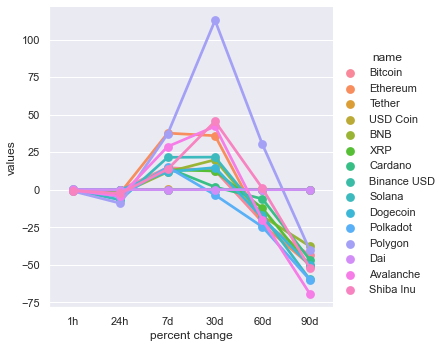

In [123]:
#Create catplot
sns.catplot(x = 'percent change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [144]:
#Query XRP,BNB,Dai
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == ['XRP','BNB','Dai']")
df9 = df9.sort_values(by='name', ascending=True)
df9


,name,quote.USD.price,timestamp
4,BNB,268.31714,2022-07-20 04:17:22.766546
4,BNB,252.37652,2022-07-21 03:48:52.398927
4,BNB,253.63384,2022-07-21 03:45:51.865652
4,BNB,253.54829,2022-07-21 03:53:44.996063
4,BNB,253.78577,2022-07-21 03:44:51.700674
4,BNB,253.54829,2022-07-21 03:54:45.178133
4,BNB,253.78577,2022-07-21 03:43:51.485538
4,BNB,253.63384,2022-07-21 03:46:52.083553
4,BNB,253.51930,2022-07-21 03:55:45.347683
4,BNB,252.37652,2022-07-21 03:47:52.222836


In [136]:
#Query Bitcoin
df11 = df[['name', 'quote.USD.price', 'timestamp']]
df11 = df11.query("name == 'Bitcoin'")
df12 = df11.reset_index()
df13 = df12.drop('index', axis=1) 
df13

,name,quote.USD.price,timestamp
0,Bitcoin,23468.53398,2022-07-20 04:17:22.766546
1,Bitcoin,23468.53398,2022-07-20 04:17:28.125724
2,Bitcoin,23468.53398,2022-07-20 04:17:48.472933
3,Bitcoin,23471.45232,2022-07-20 04:18:48.633926
4,Bitcoin,22834.25227,2022-07-21 03:43:51.485538
5,Bitcoin,22834.25227,2022-07-21 03:44:51.700674
6,Bitcoin,22822.24259,2022-07-21 03:45:51.865652
7,Bitcoin,22822.24259,2022-07-21 03:46:52.083553
8,Bitcoin,22803.30505,2022-07-21 03:47:52.222836
9,Bitcoin,22803.30505,2022-07-21 03:48:52.398927


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

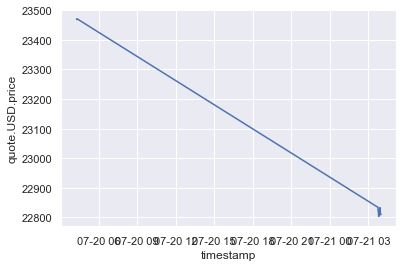

In [137]:
#Bitcoin Graph
sns.lineplot(x='timestamp', y='quote.USD.price', data=df13)